In [159]:
#Original equation: 0.996x^2 - 1.9343x - 14.149
#R^2 = 0.9993

import pandas as pd
import numpy as np

calc = pd.DataFrame(np.zeros([16,14],dtype=float),columns=['a0','a1','a2','x','Actual y','Predicted y','Diff','sum_Diff','v0', \
                                                          'v1','v2','sum_v0','sum_v1','sum_v2'])

In [160]:
#DF for calculating the gradient vector and cost function (difference in y)

#Initialize values
calc['x'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
calc['Actual y'] = [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069]

#Number of samples m
m = 16

for i in range(0,m):
    #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
    calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
    calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
    calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
    calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
    calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
    #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
    calc['sum_v0'][i] = calc['v0'][i]
    calc['sum_v1'][i] = calc['v1'][i]
    calc['sum_v2'][i] = calc['v2'][i]
    calc['sum_Diff'][i] = calc['Diff'][i]

calc['sum_Diff'] = calc['sum_Diff'].cumsum()
calc['sum_v0'] = calc['sum_v0'].cumsum()
calc['sum_v1'] = calc['sum_v1'].cumsum()
calc['sum_v2'] = calc['sum_v2'].cumsum()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [161]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,0.0,0.0,0.0,-5,21.212179,0.0,14.061142,14.061142,-1.325761,6.628806,-33.144030,-1.325761,6.628806,-33.144030
1,0.0,0.0,0.0,-4,9.001979,0.0,2.532363,16.593505,-0.562624,2.250495,-9.001979,-1.888385,8.879301,-42.146009
2,0.0,0.0,0.0,-3,0.747344,0.0,0.017454,16.610959,-0.046709,0.140127,-0.420381,-1.935094,9.019428,-42.566390
3,0.0,0.0,0.0,-2,-6.705553,0.0,1.405139,18.016098,0.419097,-0.838194,1.676388,-1.515997,8.181234,-40.890002
4,0.0,0.0,0.0,-1,-11.320071,0.0,4.004500,22.020598,0.707504,-0.707504,0.707504,-0.808492,7.473729,-40.182497
5,0.0,0.0,0.0,0,-14.364363,0.0,6.447966,28.468564,0.897773,0.000000,0.000000,0.089280,7.473729,-40.182497
6,0.0,0.0,0.0,1,-15.720397,0.0,7.722840,36.191404,0.982525,0.982525,0.982525,1.071805,8.456254,-39.199973
7,0.0,0.0,0.0,2,-13.026383,0.0,5.302708,41.494112,0.814149,1.628298,3.256596,1.885954,10.084552,-35.943377
8,0.0,0.0,0.0,3,-11.997158,0.0,4.497868,45.991981,0.749822,2.249467,6.748401,2.635776,12.334019,-29.194975
9,0.0,0.0,0.0,4,-5.789431,0.0,1.047422,47.039403,0.361839,1.447358,5.789431,2.997616,13.781377,-23.405544


In [162]:
#Number of iterations
n = 80

learn = pd.DataFrame(np.zeros([n,7],dtype=float),columns=['Cost function','a0_rate','a1_rate','a2_rate','new_a0', \
                                                          'new_a1','new_a2'])

In [163]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#Number of iteration is set to 30 (n=30) based on previous DF

#Learning rate k for a0, a1, a2

#Converges but slow
# k0 = 0.1
# k1 = 0.01
# k2 = 0.001

#Converges but a0 and a1 have slight oscillation
#k0 = 0.13
#k1 = 0.013
#k2 = 0.001

#Converges relatively quickly without oscillation or diverging
k0 = 0.12
k1 = 0.012
k2 = 0.001


#Set parameters
a0 = 0
a1 = 0
a2 = 0

for j in range(0,n):
    learn['Cost function'][j] = calc['sum_Diff'][15]
    learn['a0_rate'][j] = k0*calc['sum_v0'][15]
    learn['a1_rate'][j] = k1*calc['sum_v1'][15]
    learn['a2_rate'][j] = k2*calc['sum_v2'][15]
    a0 -= learn['a0_rate'][j]
    a1 -= learn['a1_rate'][j]
    a2 -= learn['a2_rate'][j]
    learn['new_a0'][j] = a0
    learn['new_a1'][j] = a1
    learn['new_a2'][j] = a2
    #New cost function after changing parameters
    
    #Remember to change values of a0,a1,a2 before calculating
    calc['a0'] = a0
    calc['a1'] = a1
    calc['a2'] = a2
    
    for i in range(0,m):
        #Calculate predicted y, difference of y, gradient of a0, a1, a2 (v0, v1, v2)
        calc['Predicted y'][i] = calc['a0'][i] + calc['a1'][i]*calc['x'][i] + calc['a2'][i]*calc['x'][i]**2
        calc['Diff'][i] = 1/(2*m) * (calc['Predicted y'][i] - calc['Actual y'][i])**2
        calc['v0'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i])
        calc['v1'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]
        calc['v2'][i] = 1/m * (calc['Predicted y'][i] - calc['Actual y'][i]) * calc['x'][i]**2
        #Save values of gradient and difference in new column for cumsum() cumulative sum to operate
        calc['sum_v0'][i] = calc['v0'][i]
        calc['sum_v1'][i] = calc['v1'][i]
        calc['sum_v2'][i] = calc['v2'][i]
        calc['sum_Diff'][i] = calc['Diff'][i]

    #Calculate summations for gradient vector and cost function to be used in the calculation DF
    calc['sum_Diff'] = calc['sum_Diff'].cumsum()
    calc['sum_v0'] = calc['sum_v0'].cumsum()
    calc['sum_v1'] = calc['sum_v1'].cumsum()
    calc['sum_v2'] = calc['sum_v2'].cumsum()
    

    
    
    
    


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [167]:
learn

,Cost function,a0_rate,a1_rate,a2_rate,new_a0,new_a1,new_a2
0,311.147048,-1.008636,-1.028827,-0.910332,1.008636,1.028827,0.910332
1,273.967815,2.425144,1.252642,0.794491,-1.416509,-0.223814,0.115841
2,241.257377,-0.863486,-0.901916,-0.797953,-0.553022,0.678102,0.913794
3,212.475655,2.143953,1.097323,0.695862,-2.696975,-0.419221,0.217932
4,187.148233,-0.738863,-0.790423,-0.699473,-1.958111,0.371201,0.917405
5,164.858321,1.895189,0.961477,0.609453,-3.853300,-0.590276,0.307952
6,145.239706,-0.631872,-0.692518,-0.613169,-3.221428,0.102242,0.921121
7,127.970573,1.675164,0.842623,0.533754,-4.896592,-0.740381,0.387366
8,112.768089,-0.540032,-0.606581,-0.537531,-4.356560,-0.133800,0.924897
9,99.383655,1.480598,0.738606,0.467441,-5.837158,-0.872406,0.457456


In [213]:
calc

,a0,a1,a2,x,Actual y,Predicted y,Diff,sum_Diff,v0,v1,v2,sum_v0,sum_v1,sum_v2
0,-13.970346,-1.911492,0.987684,-5,21.212179,20.279203,0.027201,0.027201,-0.058311,0.291555,-1.457775,-0.058311,0.291555,-1.457775
1,-13.970346,-1.911492,0.987684,-4,9.001979,9.478559,0.007098,0.034299,0.029786,-0.119145,0.476580,-0.028525,0.172410,-0.981195
2,-13.970346,-1.911492,0.987684,-3,0.747344,0.653282,0.000276,0.034576,-0.005879,0.017637,-0.052910,-0.034404,0.190047,-1.034105
3,-13.970346,-1.911492,0.987684,-2,-6.705553,-6.196628,0.008094,0.042670,0.031808,-0.063616,0.127231,-0.002596,0.126431,-0.906874
4,-13.970346,-1.911492,0.987684,-1,-11.320071,-11.071171,0.001936,0.044605,0.015556,-0.015556,0.015556,0.012960,0.110875,-0.891318
5,-13.970346,-1.911492,0.987684,0,-14.364363,-13.970346,0.004852,0.049457,0.024626,0.000000,0.000000,0.037586,0.110875,-0.891318
6,-13.970346,-1.911492,0.987684,1,-15.720397,-14.894154,0.021334,0.070791,0.051640,0.051640,0.051640,0.089227,0.162515,-0.839678
7,-13.970346,-1.911492,0.987684,2,-13.026383,-13.842595,0.020819,0.091609,-0.051013,-0.102026,-0.204053,0.038213,0.060489,-1.043731
8,-13.970346,-1.911492,0.987684,3,-11.997158,-10.815669,0.043622,0.135232,0.073843,0.221529,0.664587,0.112056,0.282018,-0.379143
9,-13.970346,-1.911492,0.987684,4,-5.789431,-5.813375,0.000018,0.135250,-0.001497,-0.005986,-0.023944,0.110560,0.276032,-0.403087


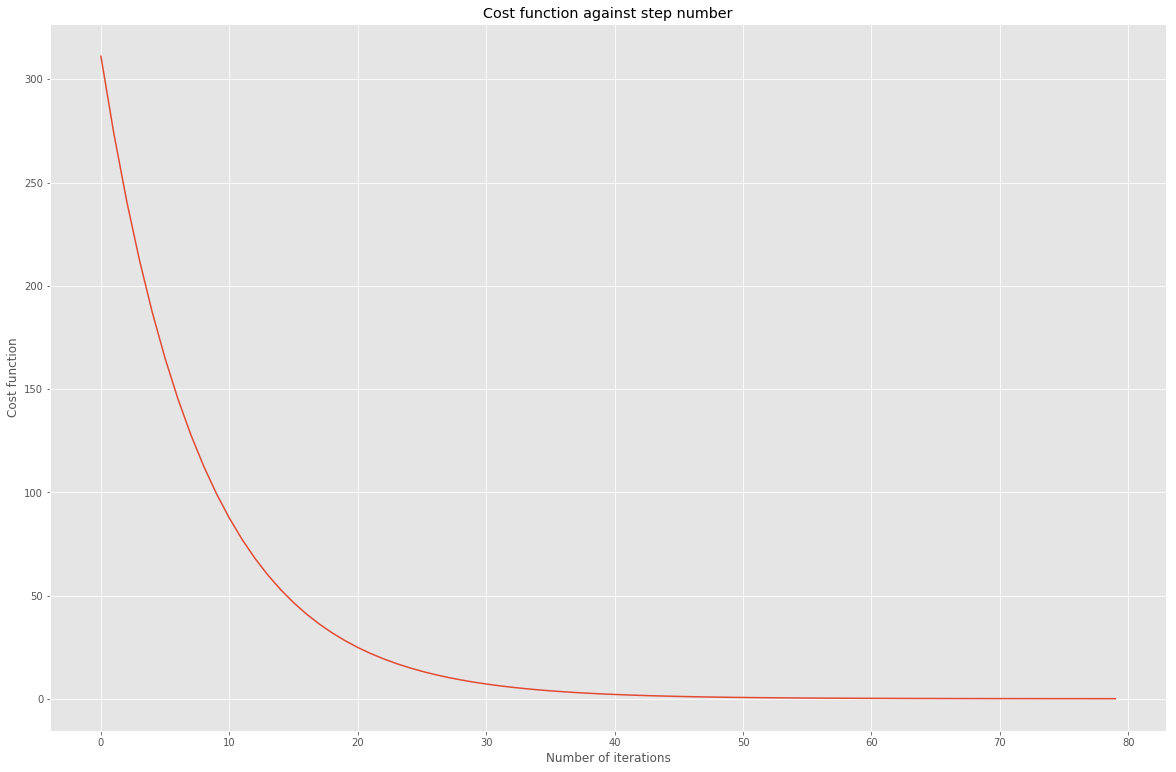

In [212]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.plot(learn.index.values,learn['Cost function'].values)
plt.title('Cost function against step number')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.savefig('Error_function.png')


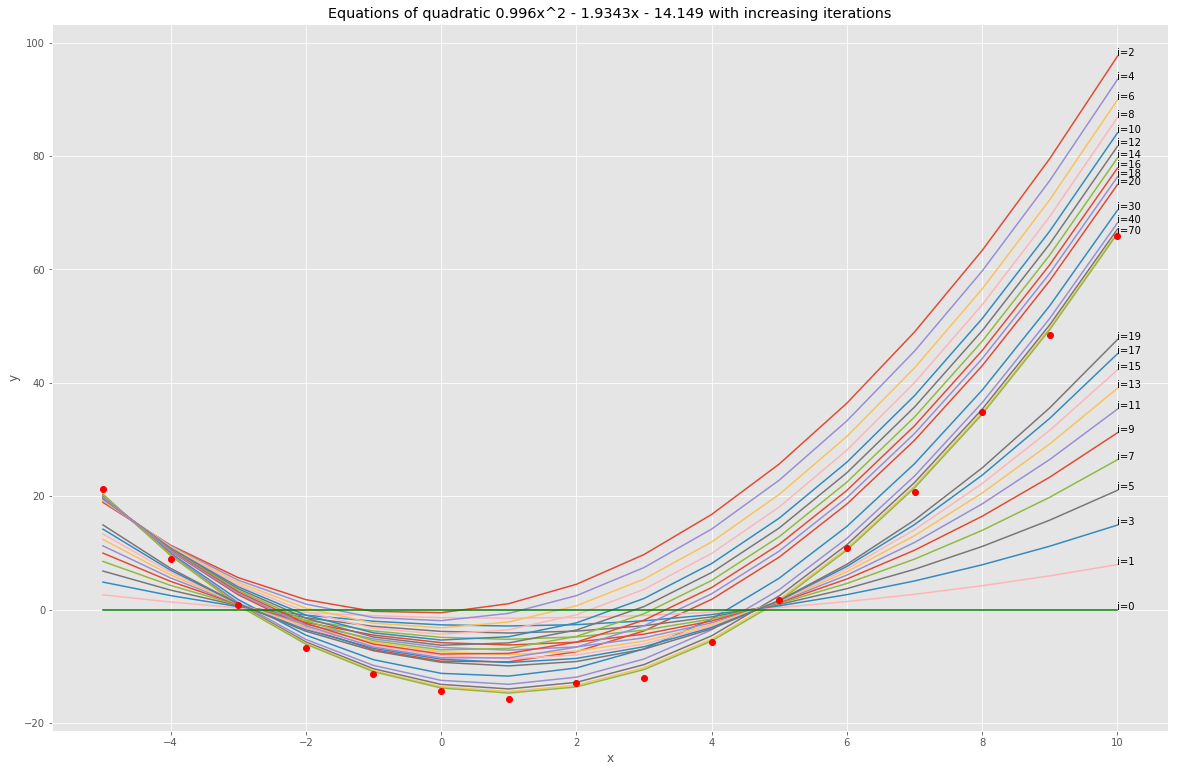

In [210]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = []

plt.rcParams["figure.figsize"] = (20,13)

#get 8 graphs, use a0,a1,a2 of iteration 0,10,20,30,40,50,60,70 which is actually step 1,11,21,31,41,51,61,71
for i in range(2,8):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i*10]+learn['new_a1'][i*10]*x[j]+learn['new_a2'][i*10]*(x[j]**2))
    plt.plot(x,y)
    if i != 5 and i !=6:
        plt.text(10, y[15], 'i='+str(i*10))



#get 9 graphs from iteration 1-9 which is step 2-11 (iteration 0,10 or step 1,11 are covered by above)
for i in range(1,20):
    #Reset y
    y = []
    #16 points from -5 to 10
    for j in range(0,16):
        y.append(learn['new_a0'][i]+learn['new_a1'][i]*x[j]+learn['new_a2'][i]*(x[j]**2))
    plt.plot(x,y)
    plt.text(10, y[15], 'i='+str(i))

    
plt.plot(x,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'g-') #baseline with green line 'g-'
plt.plot(x, [21.21217914,9.001978895,0.747344201,-6.70555256,-11.32007117,-14.36436262,-15.72039677,-13.02638345, \
                    -11.99715765,-5.789431156,1.622636555,10.91513494,20.78728975,34.84557539,48.3673002,65.90865069], 'ro')
plt.title('Equations of quadratic 0.996x^2 - 1.9343x - 14.149 with increasing iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 0, r'i=0')
plt.savefig('Gradient_descent.png')


#Actual best fit line
#a0= -13.970346 a1=-1.911492 a2=0.987684

Text(-16,0,'Change in parameters a0,a1,a2 over 80 steps')

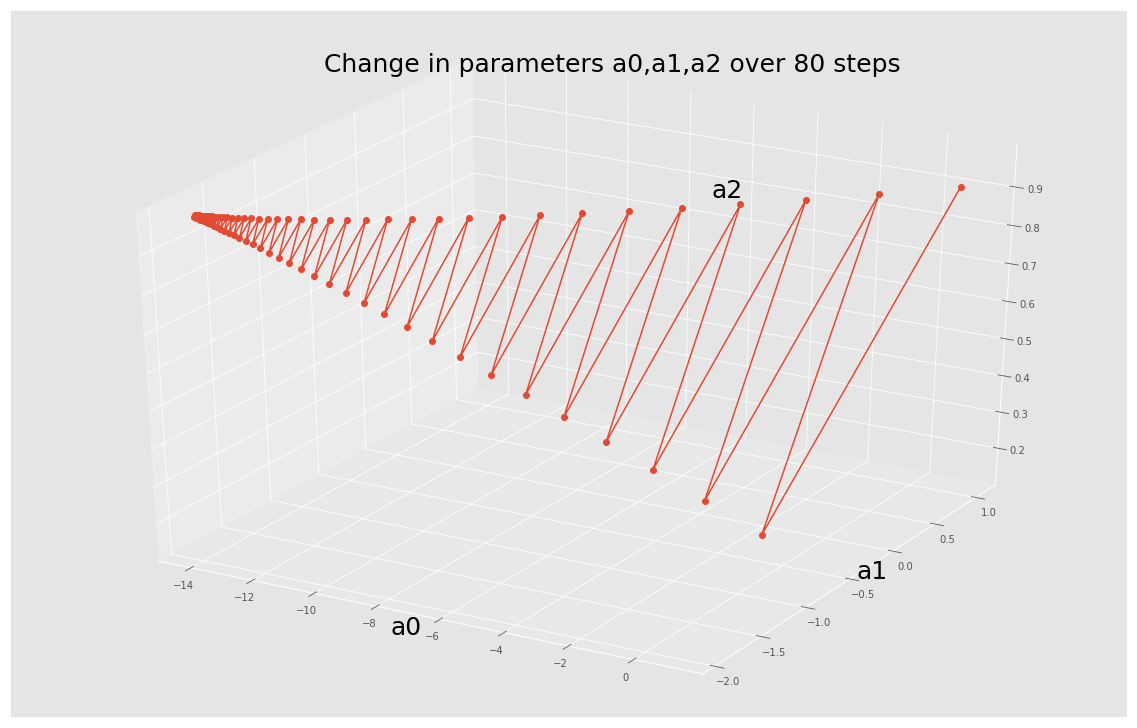

In [272]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
# parachange.text(x=0, y=0, z=0, text="red", color='red')
parachange.plot(xs=learn['new_a0'].values,ys=learn['new_a1'].values,zs=learn['new_a2'].values,marker='o')
parachange.text(1, 0, 0, s='a1', zdir=None, size=25)
parachange.text(-8, -2, 0, s='a0', zdir=None, size=25)
parachange.text(-8, 1.5, 0.7, s='a2', zdir=None, size=25)
parachange.text(-16, 0, 1.1, s='Change in parameters a0,a1,a2 over 80 steps', zdir=None, size=25)

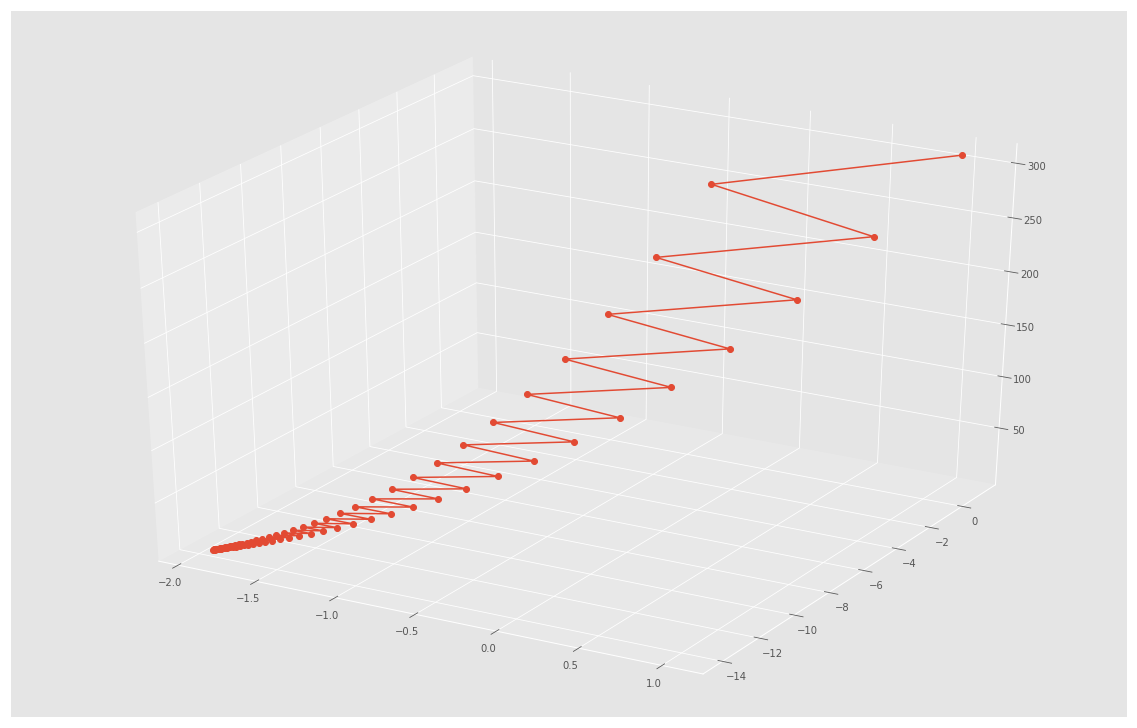

In [281]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a1'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')

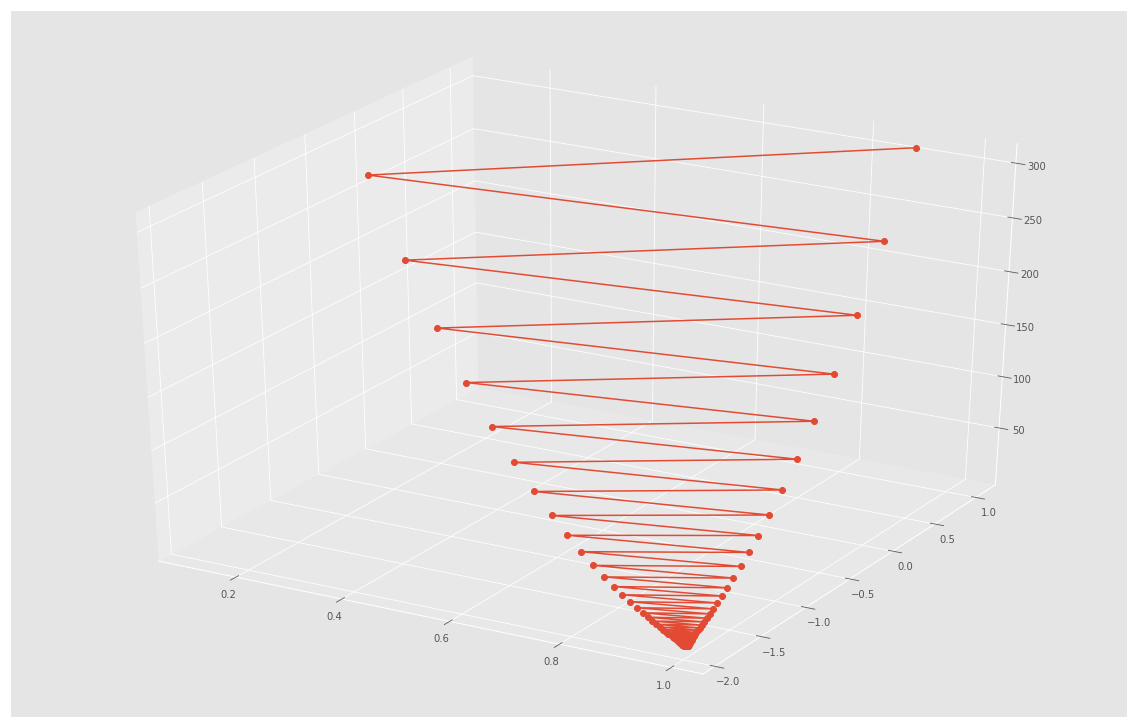

In [280]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a1'].values,zs=learn['Cost function'].values,marker='o')

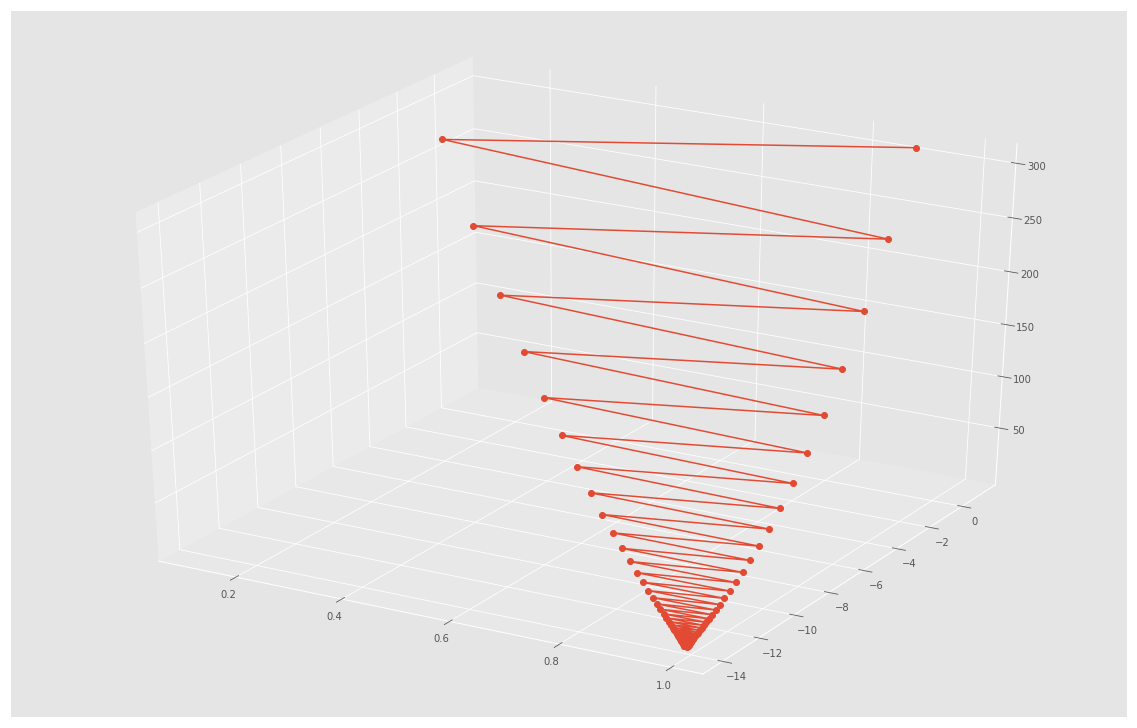

In [279]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
parachange = fig.add_subplot(111, projection='3d')
parachange.plot(xs=learn['new_a2'].values,ys=learn['new_a0'].values,zs=learn['Cost function'].values,marker='o')